In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as wdgt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Unemployment_Rates.csv')

df.columns = df.columns.str.strip()  # This was obtained by ChatGPT and will remove any leading or trailing spaces from all column names, this was an issue wth the unemployment rate
df = df.drop(['Labor Force', 'Unemployed', 'Employed'], axis = 1) # In this line I am dropping 3 columns from my dataset as they aren't necessary for my predictions
df.to_csv('updated_unemployment.csv', index=False)
df = pd.read_csv('updated_unemployment.csv') # This is the newly updated dataset which will be used for the predictions

# This is a basic import file to get the necessary libraries and allows pandas to read the file
# I had issues getting the file to read but i tried restarting my kernel on VScode and it began to work


In [ ]:
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
selected_area = None

def on_value_change(change):
    global selected_area
    selected_area = change['new']

dropdown.observe(on_value_change, names='value')

# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

# This gets all the unique areas in the state of New York, I orignally had every value which was over 91,000 so I checked the pandas documentation here (https://pandas.pydata.org/docs/reference/api/pandas.Index.unique.html#pandas.Index.unique)
# and I found the unique keyword which just displays each of then once into the dropdown menu

In [ ]:
selected_data = df[df['Area'] == selected_area]

unemployment_rates = selected_data['Unemployment Rate']
year = selected_data['Year']
month = selected_data['Month']

print(year)
print(month)
print(unemployment_rates)

# This is retrieving the unemployment rate, month and year


In [196]:
covid_filtered_df = df[(df['Area'] == selected_area) & (df['Year'] == 2021)]
normal_filtered_df = df[(df['Area'] == selected_area) & (df['Year'] == 2015)]

In [ ]:
normal_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = selected_area + ', 2015')
covid_filtered_df.plot.scatter(x = 'Month', y = 'Unemployment Rate', title = selected_area + ', 2021')

# A big factor that has an affect on my data was covid as you can see it nearly doubles for most areas when the lockdown hit

In [ ]:
model = LinearRegression(fit_intercept=True)

x = covid_filtered_df[['Month']]
y = covid_filtered_df['Unemployment Rate'] 

model.fit(x,y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)


In [215]:
# From my findings the month is going to be too specific as there are too many points to plot so I am going to combine them into an average for the year 
df = pd.read_csv('Unemployment_rates.csv')

df.columns = df.columns.str.strip()
average_unemployment = df.groupby(['Area', 'Year'])['Unemployment Rate'].mean().reset_index()

# Round the average unemployment rate to one decimal place
average_unemployment['Unemployment Rate'] = average_unemployment['Unemployment Rate'].round(1)

# Step 3: Save the results to a new CSV file
average_unemployment.to_csv('cleaned-unemployment-rates.csv', index=False)


In [216]:
df = pd.read_csv('cleaned-unemployment-rates.csv')
areas = df["Area"].unique()
dropdown = wdgt.Dropdown(options = areas)
new_selected_area = None

def on_value_change(change):
    global new_selected_area
    new_selected_area = change['new']

dropdown.observe(on_value_change, names='value')

# The code for the function on_value_change and the line below it were obtained from ChatGPT to store the currently selected value into a global variable so that I can use it for the graphs

display(dropdown)

Dropdown(options=('Albany City', 'Albany County', 'Albany-Rensselaer-Schenectady Counties', 'Albany-Schenectad…

<Axes: title={'center': 'Albany-Rensselaer-Schenectady Counties'}, xlabel='Year', ylabel='Unemployment Rate'>

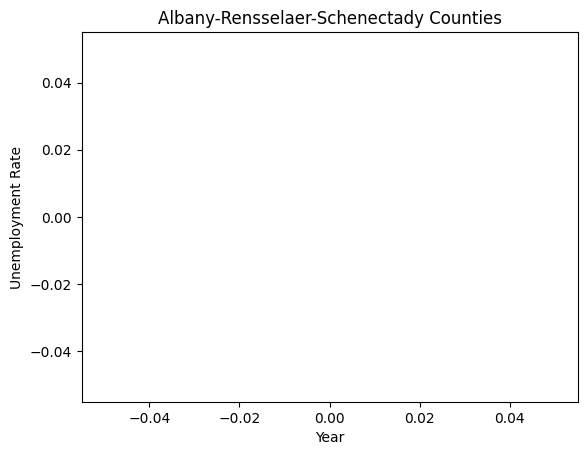

In [218]:
filtered_df = df[df['Area'] == new_selected_area]
filtered_df.plot.scatter(x = 'Year', y = 'Unemployment Rate', title = new_selected_area)